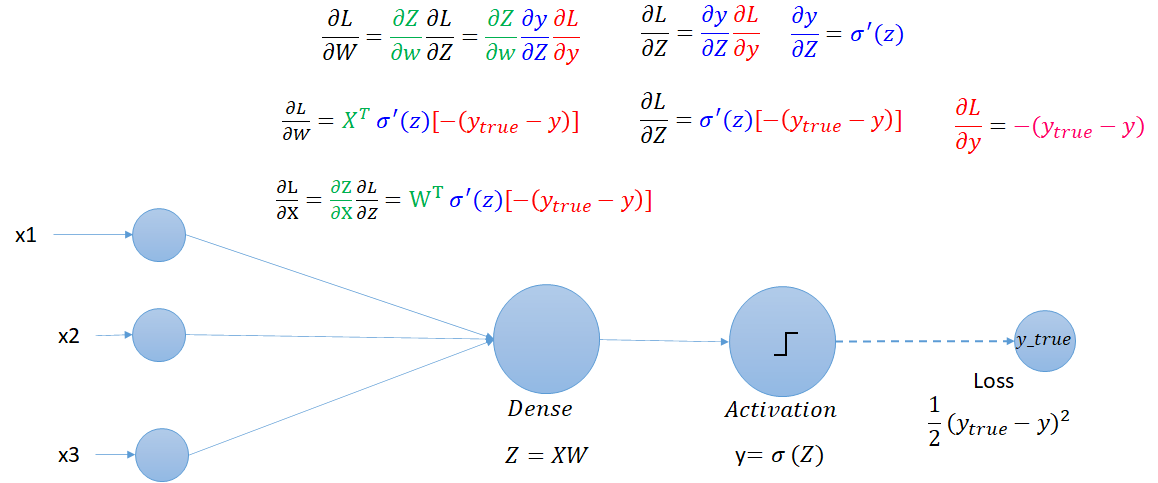

In [ ]:
# loss
class Loss:
	def forward(self, y_pred, y_true):
		self.output = np.subtract(y_true , y_pred)
		self.cost = 1/2*(self.output)*(self.output)
	def backward(self):
		self.dinputs = -1*self.output # (y_pred - y_true)

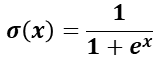

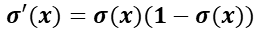

In [ ]:
# activation function
class Activation_Sigmoid:
	def forward(self, inputs):
		self.inputs = inputs
		self.output = 1/(1+np.exp(-1*inputs))
	def backward(self, dvalues):
		sigmoid = self.output
		d_sigmoid = (sigmoid)*(1-sigmoid)
		self.dinputs = np.multiply(dvalues, d_sigmoid)

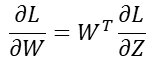

In [1]:
class Dense_Layer:
	def __init__(self, n_inputs, n_neurons):
		self.biases = np.zeros((1, n_neurons))
		self.weights = np.random.random((n_inputs, n_neurons))
	def forward(self, inputs):
		self.inputs = inputs
		self.output = (np.dot(inputs, self.weights) + self.biases)
	def backward(self, dvalues):
		self.dinputs = np.dot(dvalues, self.weights.T)
		self.dweights = np.dot(self.inputs.T, dvalues)


**Training**

In [10]:
import numpy as np
np.random.seed(1)
# input data 
inputs = np.array([[1,0,1], 
					[0,1,0], 
					[1,1,1],
					[1,0,0]])

# output data
y_true = np.array([[1,0,1,0]]).T



layer1 = Dense_Layer(3, 1)
activation1 = Activation_Sigmoid()
loss = Loss()

# update and optimizer
for i in range(1000):
    layer1.forward(inputs)
    activation1.forward(layer1.output)
    loss.forward(activation1.output, y_true)
   
    if(i%100==0):
        print(f'[{i}] cost\n{loss.cost}\n')

    loss.backward()
    activation1.backward(loss.dinputs)
    layer1.backward(activation1.dinputs)
    layer1.weights -= layer1.dweights

print(f'New synaptic weights after training:\n{layer1.weights}\n')


print('Considering new situation:\n{[0,1,1]}\n')
newZ = np.dot(np.array([0,1,1]), layer1.weights)
activationOutput = 1/(1+np.exp(-newZ))
print(activationOutput)




[0] cost
[[0.07888479]
 [0.22624816]
 [0.02947273]
 [0.18166609]]

[100] cost
[[0.00059164]
 [0.01482639]
 [0.01068921]
 [0.01619104]]

[200] cost
[[0.00011062]
 [0.00699285]
 [0.00511883]
 [0.00720851]]

[300] cost
[[4.15044959e-05]
 [4.45845274e-03]
 [3.28304540e-03]
 [4.53324452e-03]]

[400] cost
[[2.09065793e-05]
 [3.24044538e-03]
 [2.39387536e-03]
 [3.27641297e-03]]

[500] cost
[[1.23674237e-05]
 [2.53270682e-03]
 [1.87490373e-03]
 [2.55333474e-03]]

[600] cost
[[8.09132697e-06]
 [2.07281472e-03]
 [1.53668317e-03]
 [2.08601147e-03]]

[700] cost
[[5.67092800e-06]
 [1.75110128e-03]
 [1.29958727e-03]
 [1.76019366e-03]]

[800] cost
[[4.17802124e-06]
 [1.51396526e-03]
 [1.12454558e-03]
 [1.52057379e-03]]

[900] cost
[[3.19677150e-06]
 [1.33221646e-03]
 [9.90220156e-04]
 [1.33721723e-03]]

New synaptic weights after training:
[[-2.96918703]
 [-2.97091108]
 [ 9.06609266]]

Considering new situation:
{[0,1,1]}

[0.99775137]
